## Arpit kumar
## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP AT THE SPARKS FOUNDATION
### Task : 2
### Prediction using Unsupervised ML
### From the given IRIS dataset , Predict the optimum number of clusters and represent it visually.

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
#Load the Dataset
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Dataset size¶

In [5]:
df.shape

(150, 4)

### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Dataset Description - 5 point summary

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### Exploratory Data Analysis Univariate Analysis

/Users/arpitkumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


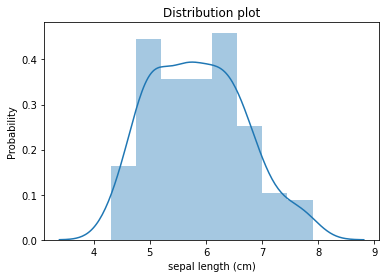

In [9]:
sns.distplot(df['sepal length (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

/Users/arpitkumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


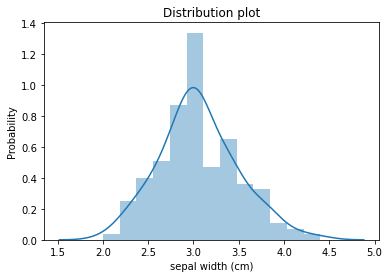

In [10]:
sns.distplot(df['sepal width (cm)'])
plt.xlabel('sepal width (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

/Users/arpitkumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


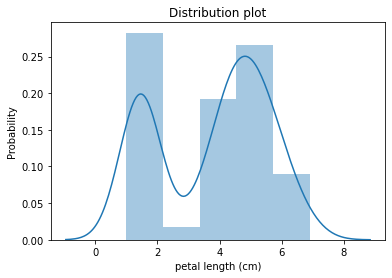

In [11]:
sns.distplot(df['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

/Users/arpitkumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


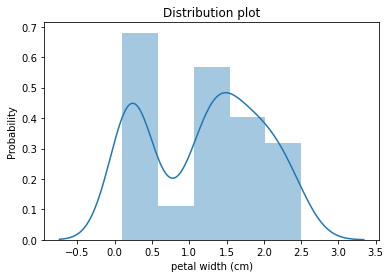

In [12]:
sns.distplot(df['petal width (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

### Multivariate Analysis¶

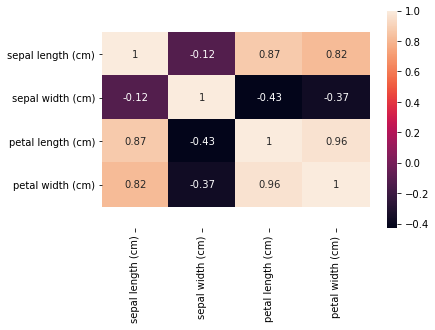

In [13]:
ax = sns.heatmap(df.corr(),annot = True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

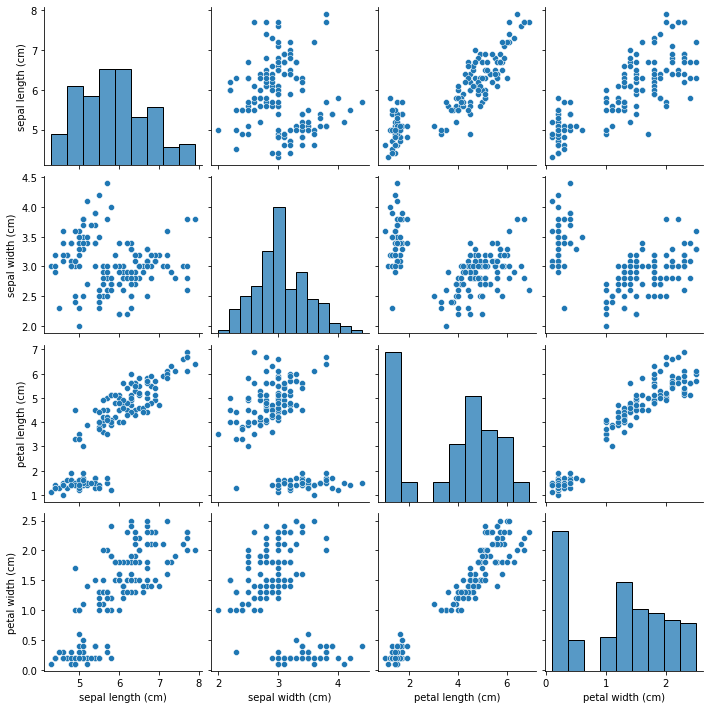

In [14]:
sns.pairplot(df)
plt.show()

### Checking for the multicollinearity¶

In [15]:
import statsmodels.api as sm
xc = sm.add_constant(df)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor (xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index = df.columns)

,VIF
sepal length (cm),7.072722
sepal width (cm),2.100872
petal length (cm),31.261498
petal width (cm),16.090175


There is high multicollinearity observed. Thus, PCA can be applied


### Data Preparation -
### 1.Standard Scaling
### 2.PCA application

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [19]:
dfs = ss.fit_transform(df)
dfs = pd.DataFrame(dfs)
dfs.columns = df.columns
dfs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [20]:
from sklearn.decomposition import PCA
pca = PCA()

In [21]:
pca.fit(dfs)

PCA()

In [22]:
pd.DataFrame({'Eigen values': pca.explained_variance_,
              'Proportion Explained':pca.explained_variance_ratio_,
              'Cumulative proportion explained':np.cumsum(pca.explained_variance_ratio_)})

,Eigen values,Proportion Explained,Cumulative proportion explained
0,2.938085,0.729624,0.729624
1,0.920165,0.228508,0.958132
2,0.147742,0.036689,0.994821
3,0.020854,0.005179,1.000000


In [23]:
pca = PCA(0.95)
df_pca = pca.fit_transform(dfs)
cols = list(dfs.columns)
PCA_df = pd.DataFrame(pca.components_.T,index = cols,columns=['PC1','PC2']).reset_index().rename(columns={'index':'Features'})
PCA_df

,Features,PC1,PC2
0,sepal length (cm),0.521066,0.377418
1,sepal width (cm),-0.269347,0.923296
2,petal length (cm),0.580413,0.024492
3,petal width (cm),0.564857,0.066942


From above table:
1.PC1 explains 0.521 variation for sepal length, -0.269 variation for sepal width and so on
*2.Out of the total variation in the sepal width, 0.521 is explained by PC1 and 0.377 is explained by PC2, so on and so forth

### KMeans Clustering*

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(random_state = 0)

In [25]:
wcss = []
sil_score = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_pca,kmeans.labels_))
print(wcss,'\n',sil_score)

[197.4038160454129, 115.18647050742705, 89.5133347231435, 66.18758354093681, 57.07033876393042, 47.789058781554644, 39.575111264446946, 32.12667995141308, 29.063483296792796, 24.486791289541454, 22.817721475748236, 20.169607748580333, 17.89809261693215] 
 [0.6145202036230452, 0.511324517646045, 0.4451870974215422, 0.4143377562653906, 0.41458546512732447, 0.4242346673316641, 0.4427967633617635, 0.43843589763557833, 0.4410681175429062, 0.44416149892178386, 0.43918825878292844, 0.4441869243295795, 0.4238516035339207]


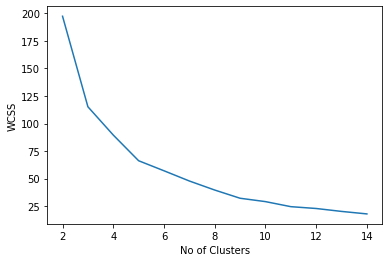

In [26]:
#Elbow plot
plt.plot(range(2,15),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()


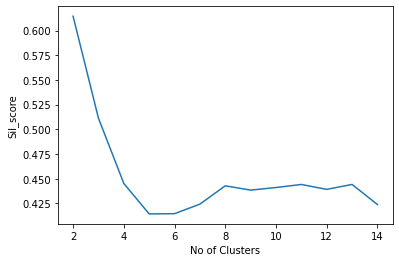

In [27]:
#Silhouette Score
plt.plot(range(2,15),sil_score)
plt.xlabel('No of Clusters')
plt.ylabel('Sil_score')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3,n_init=15,random_state=0)
kmeans.fit(df_pca)

KMeans(n_clusters=3, n_init=15, random_state=0)

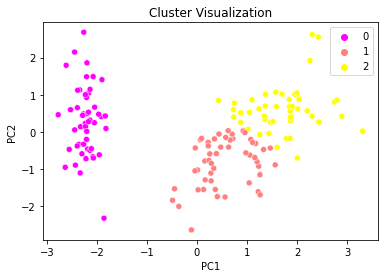

In [29]:
pd.Series(kmeans.labels_).value_counts()
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],hue=kmeans.labels_,palette='spring')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization')
plt.show()


In [30]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,-2.224753,0.288927
1,0.572621,-0.807209
2,1.721037,0.602887


In case of both the PCs, the controls are far apart from eachother.Thus, well diffentiated clusters

In [31]:
df['labels']=kmeans.labels_

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
df.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.801887,2.673585,4.369811,1.413208
2,6.780851,3.095745,5.510638,1.972340


With regards to 3 clusters, below are some observations:
1.The sepal length of flowers in cluster 0 is largest.
2.The sepal width of flowers in cluster 2 is smallest.
3.The petal length of flowers in cluster 1 is the largest.This was to happen as sepal length and petal length are highly correlated.
4.The petal width of flowers in clusters 0 is largest